# **COVID 19 Impact on Ecommerce ASSIGNMENT**


---



Assignment

---



**Team:** Team Vishleshi


---











## **Abstract**

Foo bar..


---






## **Problem Statement & Business Context**

The details of the problem context and the analytical overview can be found HERE



---









## **Exploratory Data Analysis**

In [1]:
!pip install gensim
!pip install wordcloud

### Print Formats & Libraries

In [21]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [22]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore
from sklearn import svm
from platform import python_version
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim.corpora  as corpora

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
from wordcloud import WordCloud
import glob

print (color.BOLD + color.RED + "Solving for the current objective we will be using python version " + python_version())

Solving for the current objective we will be using python version 3.7.6


### Data Loading

In [26]:
data = pd.read_csv('all_ticketsnew.csv')
data.head()

,title,body,body-tokenized
0,NaN,hi since recruiter lead permission approve req...,"['h', ' ', 'n', 'c', 'e', ' ', 'r', 'e', 'c', ..."
1,connection with icon,icon dear please setup icon per icon engineers...,"['c', 'n', ' ', 'e', 'r', ' ', 'p', 'l', 'e', ..."
2,work experience user,work experience user hi work experience studen...,"['w', 'r', 'k', ' ', 'e', 'x', 'p', 'e', 'r', ..."
3,requesting for meeting,requesting meeting hi please help follow equip...,"['r', 'e', 'q', 'u', 'e', 'n', 'g', ' ', 'e', ..."
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,"['r', 'e', ' ', 'e', 'x', 'p', 'r', 'e', ' ', ..."


### Create Bigram & Trigram Modes Using Gensim

In [27]:
def sent_to_words (sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))
        
data_words=list(sent_to_words(data['body']))
data_words[:1]

[['hi',
  'since',
  'recruiter',
  'lead',
  'permission',
  'approve',
  'requisitions',
  'makes',
  'please',
  'make',
  'thanks',
  'recruiter']]

In [29]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print (trigram_mod[bigram_mod[data_words[0]]])

['hi', 'since', 'recruiter', 'lead', 'permission', 'approve', 'requisitions', 'makes', 'please', 'make', 'thanks', 'recruiter']


In [27]:
#Removing StopWords
nltk.download('stopwords')
stop_words=list(stopwords.words('english'))
# Removing Stop Words
stop_words=stop_words + ['hi','please','know',
'high','monday','assist','st','file','requested','created','added','per','well','next','approve','care','item','back','submitted','meeting','annual'
'monday','hub','engineer','name','analyst','code','number','ticket','approved','available','head','delete','view','task','status','leaver','monday','problem','va','importance','developer','submit','users','ad','one','ask','take','note','old','guys','id','po','advise','assign','lead','id','po','today','need','test','ca','make','mailbox','required','received','phone','needed','user','receive','assigned','days','february','create','error','november', 'request', 'kindly', 'covid19', 'requesting','thank','thanks','regards','best','en','he','please','hi','please','dear','help','kindly','kind','hello','super','much','advised','pm','sent','tuesday','wednesday','thursday','friday','saturday','july','October','November','could','ext','issue','let','log','attached','change','october','date','also','information','senior','add','form','details','december','provide','leave','march','si','issues','manager','working','cannot','find','la','regards','thank','hello','sent','kind','help','dear','best','let','please','could','thanks']

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmitization(texts):
    accepted_tags=['NOUN','ADJ','VERB','ADV']
    texts_out=[]
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in accepted_tags])

[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
data_words =  remove_stopwords(data_words)
data_words_bigrams =  make_bigrams(data_words)

print (data_words_bigrams[:1])

[['since', 'recruiter', 'permission', 'requisitions', 'makes', 'recruiter']]


In [32]:
id2word = corpora.Dictionary(data_words)
texts =  data_words
corpus = [id2word.doc2bow(text) for text in texts]

print (corpus[:1])
print ([[(id2word[id],freq) for id, freq in cp] for cp in corpus[:1]])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1)]]
[[('makes', 1), ('permission', 1), ('recruiter', 2), ('requisitions', 1), ('since', 1)]]


## Baseline LDA Model

In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for topic in lda_model.print_topics():
    print (topic)
    print ('\n')

(0, '0.015*"access" + 0.014*"message" + 0.014*"password" + 0.010*"server" + 0.008*"following" + 0.008*"open" + 0.008*"work" + 0.007*"laptop" + 0.007*"get" + 0.007*"contact"')


(1, '0.029*"registered" + 0.022*"kingdom" + 0.020*"floor" + 0.017*"street" + 0.014*"administrator" + 0.014*"cable" + 0.014*"broad" + 0.014*"room" + 0.013*"requisition" + 0.012*"th"')


(2, '0.023*"access" + 0.011*"approval" + 0.011*"report" + 0.009*"sa" + 0.008*"th" + 0.007*"card" + 0.007*"week" + 0.007*"action" + 0.007*"officer" + 0.006*"still"')




In [34]:
doc_lda = lda_model[corpus]
perpexity = lda_model.log_perplexity(corpus)
coherence_model = gensim.models.ldamodel.CoherenceModel(model=lda_model, 
                                texts=data_words,
                                dictionary=id2word,
                                coherence='c_v')

coherence_score = coherence_model.get_coherence()

print ('Perpexity score is %f and Coherence score is %f'%(perpexity,coherence_score))

Perpexity score is -7.813857 and Coherence score is 0.529274


## Find the optimal number of topics for LDA

In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = gensim.models.ldamodel.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [36]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_words, 
                                                        start=2, 
                                                        limit=4, 
                                                        step=1)

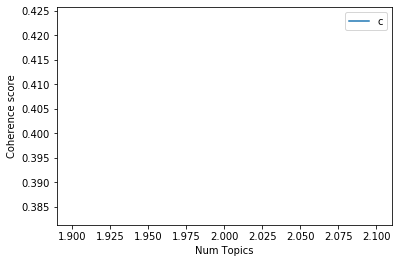

In [37]:
# Show graph
limit=4; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [38]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)

for topic in optimal_model.print_topics(num_words=10):
    print (topic)
    print ('\n')    

Num Topics = 2  has Coherence Value of 0.4035
(0, '0.009*"report" + 0.007*"sa" + 0.007*"client" + 0.006*"officer" + 0.006*"site" + 0.005*"annual" + 0.005*"expense" + 0.005*"reports" + 0.005*"confluence" + 0.005*"action"')


(1, '0.025*"access" + 0.009*"message" + 0.008*"password" + 0.008*"card" + 0.008*"server" + 0.008*"following" + 0.007*"get" + 0.007*"laptop" + 0.007*"able" + 0.006*"check"')




## Finding the dominant topic in each sentence 

In [39]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data_words)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9163,"access, message, password, card, server, follo...","[since, recruiter, permission, requisitions, m..."
1,1,1.0,0.7368,"access, message, password, card, server, follo...","[icon, setup, icon, icon, engineers]"
2,2,0.0,0.9241,"report, sa, client, officer, site, annual, exp...","[work, experience, work, experience, student, ..."
3,3,1.0,0.9137,"access, message, password, card, server, follo...","[follow, equipments, cable, pc, cord, plug]"
4,4,1.0,0.6657,"access, message, password, card, server, follo...","[expire, update, passwords, colleagues, expire..."
5,5,1.0,0.5968,"access, message, password, card, server, follo...","[verification, warning, got, addresses, monito..."
6,6,0.0,0.8916,"report, sa, client, officer, site, annual, exp...","[looks, blacklisted, receiving, mails, anymore..."
7,7,0.0,0.9590,"report, sa, client, officer, site, annual, exp...","[prod, tunneling, tunneling, host, host, host,..."
8,8,0.0,0.8370,"report, sa, client, officer, site, annual, exp...","[modules, report, report, cost]"
9,9,0.0,0.7487,"report, sa, client, officer, site, annual, exp...","[passwords, client, passwords]"


In [40]:
df_dominant_topic['Dominant_Topic'].value_counts()

0.0    24322
1.0    24227
Name: Dominant_Topic, dtype: int64

## Find the most representative document for each topic

In [41]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

#The tabular output above actually has 20 rows, one each for a topic. It has the topic number, 
#the keywords, and the most representative document. The Perc_Contribution column is nothing 
#but the percentage contribution of the topic in the given document.
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9987,"report, sa, client, officer, site, annual, exp...","[unblocked, confluence, confluence, confluence..."
1,1.0,0.9986,"access, message, password, card, server, follo...","[order, investigate, copyright, edition, bit, ..."


## Topic distribution across documents

In [42]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,1.0,"access, message, password, card, server, follo...",24322.0,0.501
1.0,1.0,"access, message, password, card, server, follo...",24227.0,0.499
2.0,0.0,"report, sa, client, officer, site, annual, exp...",NaN,NaN
3.0,1.0,"access, message, password, card, server, follo...",NaN,NaN
4.0,1.0,"access, message, password, card, server, follo...",NaN,NaN
...,...,...,...,...
48544.0,1.0,"access, message, password, card, server, follo...",NaN,NaN
48545.0,0.0,"report, sa, client, officer, site, annual, exp...",NaN,NaN
48546.0,1.0,"access, message, password, card, server, follo...",NaN,NaN
48547.0,0.0,"report, sa, client, officer, site, annual, exp...",NaN,NaN


In [43]:
df_dominant_topics.to_csv('alltickets_three_topics.csv')

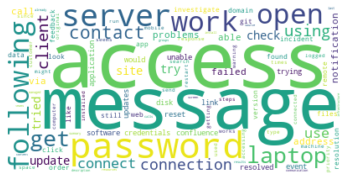

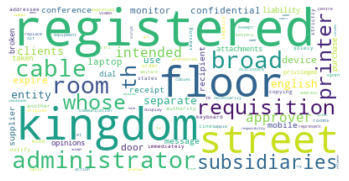

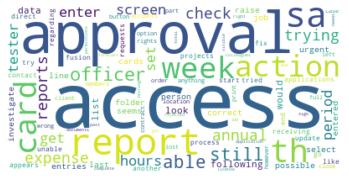

In [84]:
topic = 0 # Initialize counter
while topic <= i:
    # Get topics and frequencies and store in a dictionary structure
    topic_words_freq = dict(lda_model.show_topic(topic, topn=100)) # NB. the 'dict()' constructor builds dictionaries from sequences (lists) of key-value pairs - this is needed as input for the 'generate_from_frequencies' word cloud function
    topic += 1
    
    # Generate Word Cloud for topic using frequencies
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(topic_words_freq) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Wordcloud for Each Theme

In [33]:
df3topic=pd.read_csv('all_tickets_processed_3topics.csv')

In [37]:
topic0df=df3topic[df3topic['Target']==0]
topic1df=df3topic[df3topic['Target']==1]
topic2df=df3topic[df3topic['Target']==2]

In [38]:
topic0df=topic0df[0:5000]
topic1df=topic1df[0:5000]
topic2df=topic2df[0:5000]

In [40]:
topic0df['body']=topic0df['body'].apply(lambda x:x.lower().split())
topic0df['body']=topic0df['body'].apply(lambda x: [item for item in x if item not in stop_words])

In [44]:
topic1df['body']=topic1df['body'].apply(lambda x:x.lower().split())
topic1df['body']=topic1df['body'].apply(lambda x: [item for item in x if item not in stop_words])

In [45]:
topic2df['body']=topic2df['body'].apply(lambda x:x.lower().split())
topic2df['body']=topic2df['body'].apply(lambda x: [item for item in x if item not in stop_words])

In [46]:
import nltk
from nltk.collocations import *
from wordcloud import WordCloud

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
def create_trigrams(df):
    
    trigram_measures = nltk.collocations.TrigramAssocMeasures()

    tokens=[]
    for l in df['body']:
        for w in l:
            tokens.append(w)

    word_fd = nltk.FreqDist(nltk.bigrams(tokens))
    bigram_fd = nltk.FreqDist(nltk.bigrams(tokens))

    ignored_words = nltk.corpus.stopwords.words('english')

    finder = TrigramCollocationFinder.from_words(tokens)
    # finder.apply_word_filter(lambda w: w in ('commerce', '1','2','3','4','5','6','7','8','9','10','card'))
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    finder.apply_freq_filter(2)
    best_trigrams=sorted(finder.nbest(trigram_measures.raw_freq,2000))

    trigram_tokens=[]
    for challenge in best_trigrams:
        trigram = challenge[0]+'_'+challenge[1]+'_'+challenge[2]
        trigram_tokens.append(trigram)
    
    return trigram_tokens

Word Cloud for 'Customer Feedback Related Incidents'


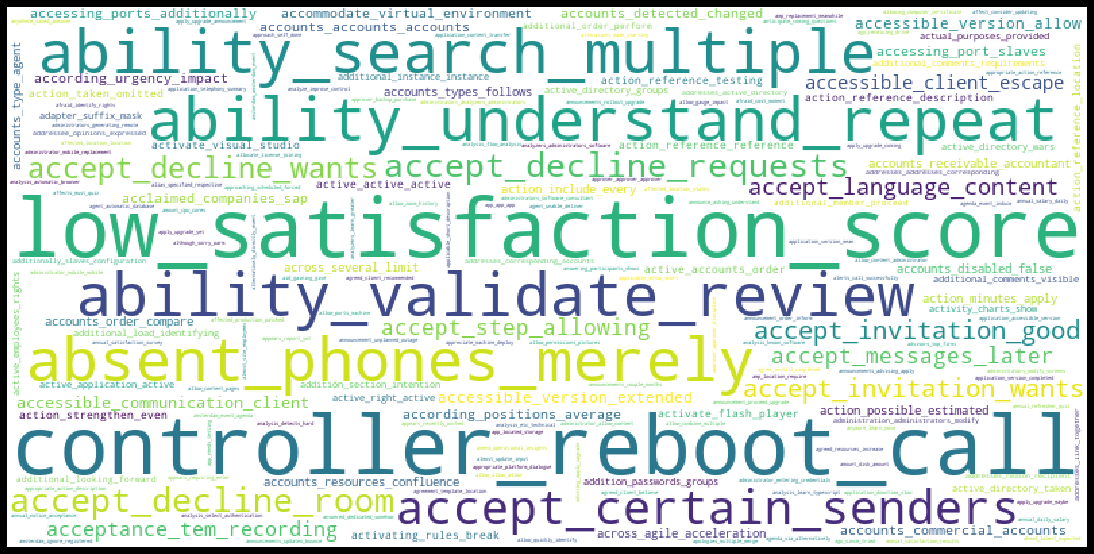

In [51]:
trigram_tokens = create_trigrams(topic0df)

words=""
for word in trigram_tokens:
  words+=" "+word

print(color.BOLD + color.BLUE + "Word Cloud for 'Customer Feedback Related Incidents'")

wordcloud = WordCloud(max_words=500, background_color="white",width=800, height=400,collocations=False).generate(words)
plt.figure(figsize = (15, 15), facecolor = 'k') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()     

Word Cloud for 'Hardware Purchase Related Requests'


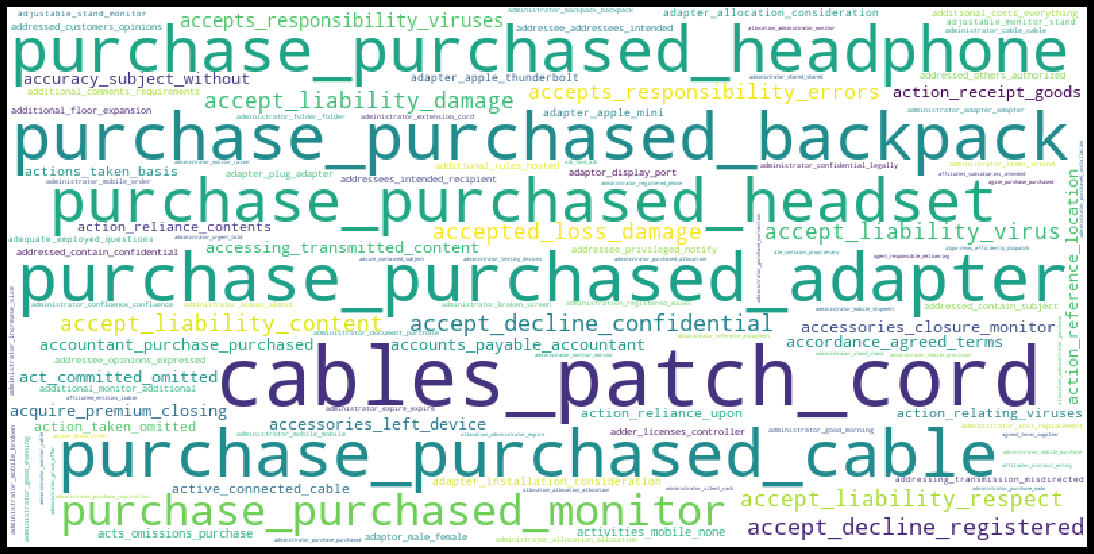

In [50]:
trigram_tokens = create_trigrams(topic1df)

words=""
for word in trigram_tokens:
  words+=" "+word

print(color.BOLD + color.BLUE + "Word Cloud for 'Hardware Purchase Related Tickets'")

wordcloud = WordCloud(max_words=500, background_color="white",width=800, height=400,collocations=False).generate(words)
plt.figure(figsize = (15, 15), facecolor = 'k') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()     

Word Cloud for 'HR Related Requests'


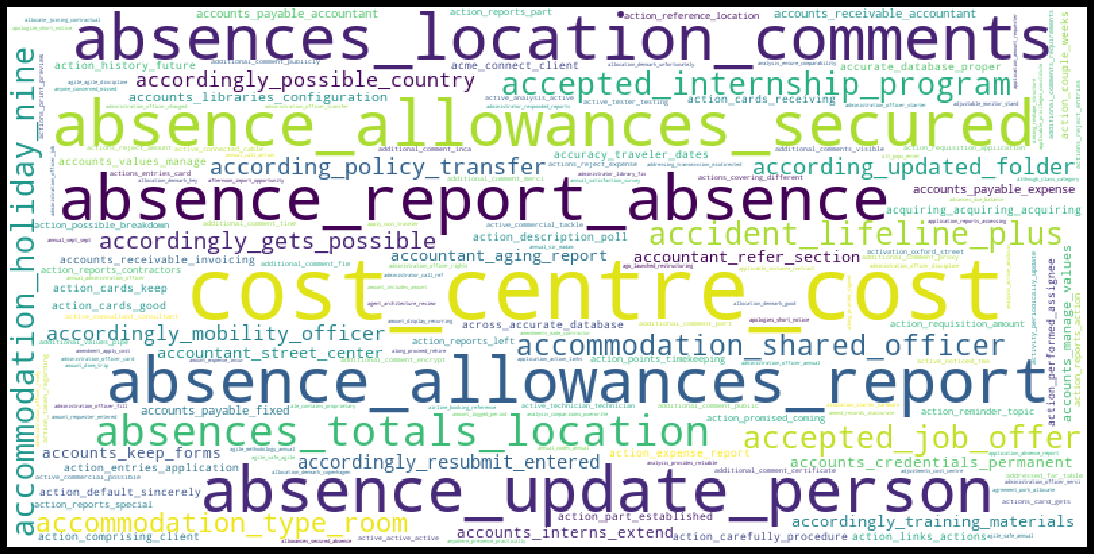

In [49]:
trigram_tokens = create_trigrams(topic2df)

words=""
for word in trigram_tokens:
  words+=" "+word

print(color.BOLD + color.BLUE + "Word Cloud for 'HR Related Requests'")

wordcloud = WordCloud(max_words=500, background_color="white",width=800, height=400,collocations=False).generate(words)
plt.figure(figsize = (15, 15), facecolor = 'k') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()     